In [2]:
import pandas as pd


In [12]:
customers_path = '/content/Customers.csv'
products_path = '/content/Products.csv'
transactions_path = '/content/Transactions.csv'


In [13]:
customers = pd.read_csv(customers_path)
products = pd.read_csv(products_path)
transactions = pd.read_csv(transactions_path)


In [15]:
# Display the first few rows of each dataset
customers.head(), products.head(), transactions.head()

(  CustomerID        CustomerName         Region  SignupDate
 0      C0001    Lawrence Carroll  South America  2022-07-10
 1      C0002      Elizabeth Lutz           Asia  2022-02-13
 2      C0003      Michael Rivera  South America  2024-03-07
 3      C0004  Kathleen Rodriguez  South America  2022-10-09
 4      C0005         Laura Weber           Asia  2022-08-15,
   ProductID              ProductName     Category   Price
 0      P001     ActiveWear Biography        Books  169.30
 1      P002    ActiveWear Smartwatch  Electronics  346.30
 2      P003  ComfortLiving Biography        Books   44.12
 3      P004            BookWorld Rug   Home Decor   95.69
 4      P005          TechPro T-Shirt     Clothing  429.31,
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
 0        T00001      C0199      P067  2024-08-25 12:38:23         1   
 1        T00112      C0146      P067  2024-05-27 22:23:54         1   
 2        T00166      C0127      P067  2024-04-25 07:38:55    

In [16]:
# Check for missing values and basic statistics in each dataset
customers_info = customers.info(), customers.describe(include='all')
products_info = products.info(), products.describe(include='all')
transactions_info = transactions.info(), transactions.describe(include='all')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


In [17]:
# Check for duplicates in each dataset
customers_duplicates = customers.duplicated().sum()
products_duplicates = products.duplicated().sum()
transactions_duplicates = transactions.duplicated().sum()

customers_info, products_info, transactions_info, customers_duplicates, products_duplicates, transactions_duplicates

((None,
         CustomerID      CustomerName         Region  SignupDate
  count         200               200            200         200
  unique        200               200              4         179
  top         C0001  Lawrence Carroll  South America  2024-11-11
  freq            1                 1             59           3),
 (None,
         ProductID            ProductName Category       Price
  count        100                    100      100  100.000000
  unique       100                     66        4         NaN
  top         P001  ActiveWear Smartwatch    Books         NaN
  freq           1                      4       26         NaN
  mean         NaN                    NaN      NaN  267.551700
  std          NaN                    NaN      NaN  143.219383
  min          NaN                    NaN      NaN   16.080000
  25%          NaN                    NaN      NaN  147.767500
  50%          NaN                    NaN      NaN  292.875000
  75%          NaN         

**Customers Dataset**

No missing values or duplicates.

Contains 200 unique customers across 4 regions: "South America," "Asia," "North America," and "Europe."


**Products Dataset**

No missing values or duplicates.

100 unique products in 4 categories: "Books," "Electronics," "Home Decor," and "Clothing." Prices range from 16.08 to 497.76.


**Transactions Dataset**

No missing values or duplicates.

Includes 1,000 transactions, with quantities ranging from 1 to 4 and total transaction values between 16.08 and 1,991.04.

# **Exploratory Data Analysis (EDA)**

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
# Convert date columns to datetime format for analysis
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


<ipython-input-20-e859ccdc3701>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")


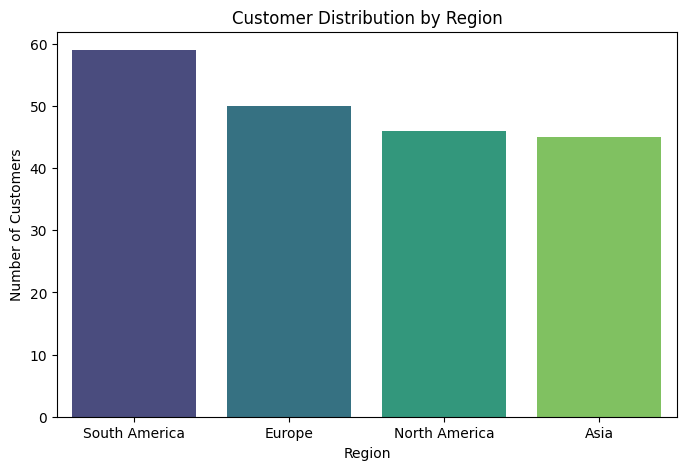

In [20]:
# EDA: Overview of customer distribution by region
region_counts = customers['Region'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()


<ipython-input-21-3e5ef00f96ca>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette="magma")


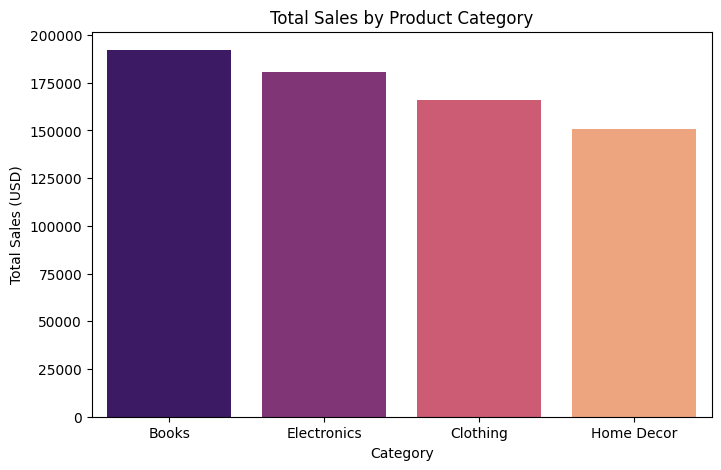

In [21]:
# EDA: Top product categories by total sales
product_sales = transactions.merge(products, on='ProductID')
category_sales = product_sales.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=category_sales.index, y=category_sales.values, palette="magma")
plt.title("Total Sales by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Sales (USD)")
plt.show()


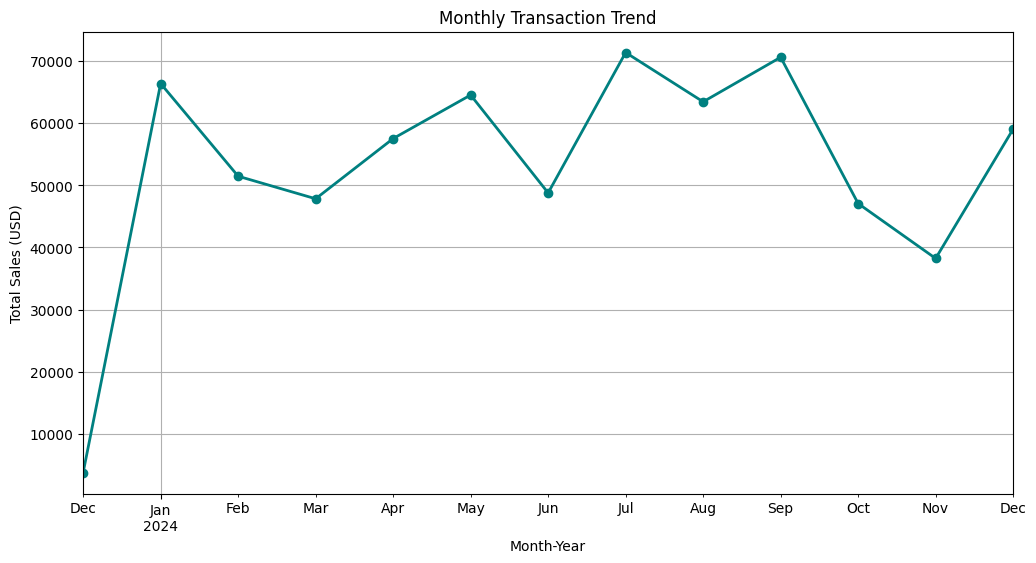

In [24]:
# EDA: Monthly transaction trend
transactions['MonthYear'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('MonthYear')['TotalValue'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='teal', linewidth=2)
plt.title("Monthly Transaction Trend")
plt.xlabel("Month-Year")
plt.ylabel("Total Sales (USD)")
plt.grid()
plt.show()


<ipython-input-25-4754b365f772>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=product_sales_summary.index, x=product_sales_summary.values, palette="coolwarm")


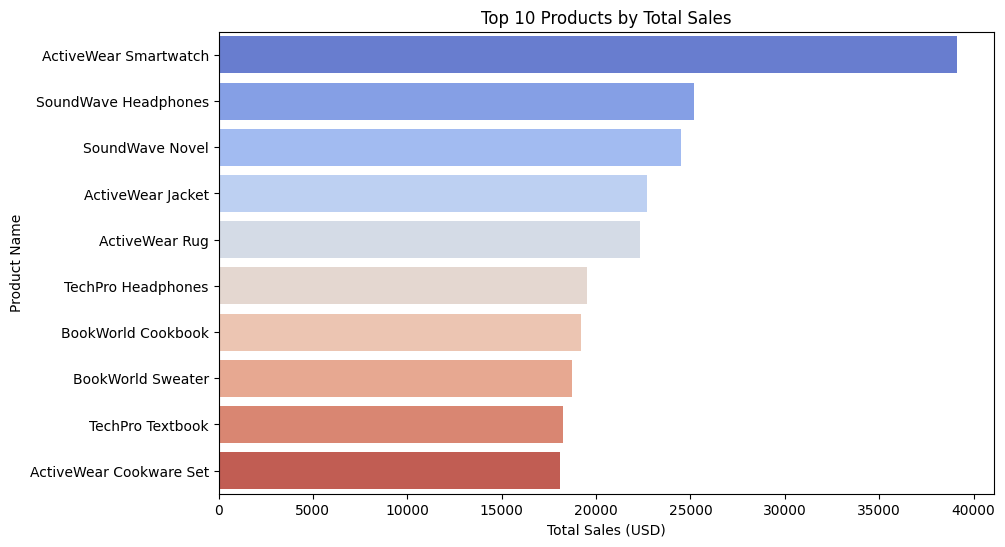

In [25]:
# EDA: Top 10 products by sales
product_sales_summary = product_sales.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=product_sales_summary.index, x=product_sales_summary.values, palette="coolwarm")
plt.title("Top 10 Products by Total Sales")
plt.xlabel("Total Sales (USD)")
plt.ylabel("Product Name")
plt.show()


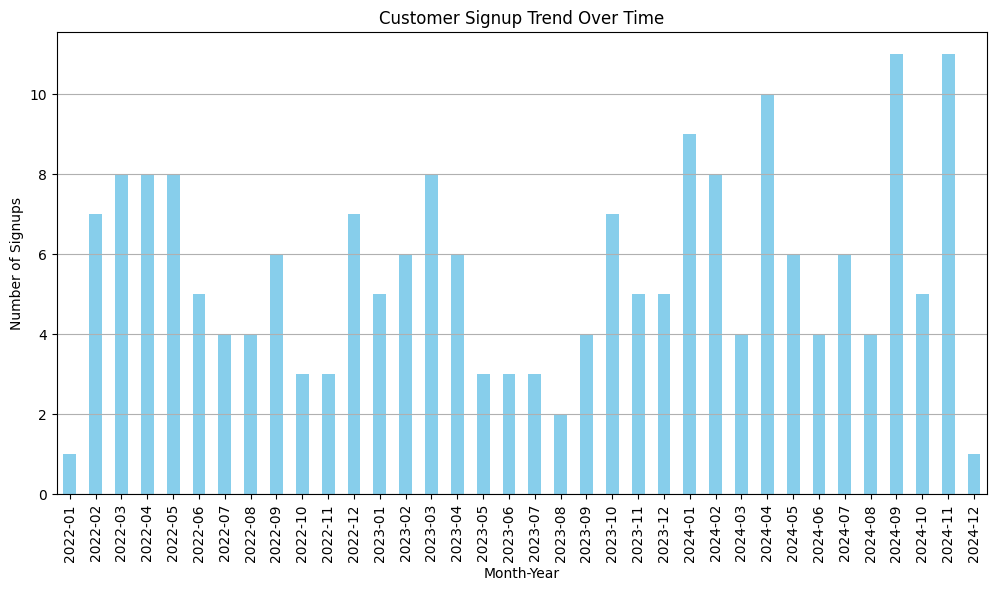

In [26]:
# EDA: Customer signup trend
signup_trend = customers.groupby(customers['SignupDate'].dt.to_period('M')).size()
plt.figure(figsize=(12, 6))
signup_trend.plot(kind='bar', color='skyblue')
plt.title("Customer Signup Trend Over Time")
plt.xlabel("Month-Year")
plt.ylabel("Number of Signups")
plt.grid(axis='y')
plt.show()